# NY Housing Price - Regression
## Part 1. EDA
<br>

**Table of Contents**

1. [Overview](#overview)
2. [Train/test split](#split) - train/test best practice is splitting before doing any EDA, it is not strictly followed to save time on analysis
3. [Categorical features](#cat)
4. [Numerical features](#num)
5. [Segmentation (num vs. cat)](#seg)
6. [Correlation (num vs. num)](#corr)

In [1]:
# import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

<a name='overview'></a>
### 1. Overview

In [2]:
df = pd.read_csv('../data/real_estate_data.csv')
print (df.shape)

(1883, 26)


In [3]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [4]:
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [5]:
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


In [6]:
df.dtypes[df.dtypes == 'object'].index.tolist()

['property_type', 'exterior_walls', 'roof']

In [7]:
target_col = 'tx_price'
cat_cols = df.dtypes[df.dtypes == 'object'].index.tolist()
num_cols = df.dtypes[df.dtypes != 'object'].index.tolist()

print("cat_cols: ", cat_cols,"\nnum_cols: ", num_cols,"\ntarget_col: ", target_col )

cat_cols:  ['property_type', 'exterior_walls', 'roof'] 
num_cols:  ['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size', 'basement', 'restaurants', 'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment', 'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad', 'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'] 
target_col:  tx_price


<a id = 'split'></a>

### 2. Train/test split
**Only one data set is available, hence, it is split into training and test sets**

In [8]:
train, test = train_test_split(df, test_size = 0.2, random_state = 123)
print (train.shape, test.shape)

(1506, 26) (377, 26)


<a id = 'cat'></a>
### 3. Categorical geatures

In [9]:
print(cat_cols)

['property_type', 'exterior_walls', 'roof']


In [10]:
df[cat_cols].describe()

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


In [11]:
train[cat_cols].describe()

,property_type,exterior_walls,roof
count,1506,1328,1222
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,854,547,951


<div class = 'alert alert-info'>

**Categories in train set cover all categories present in the entire df, the split is good, stash away the test set.**

In [12]:
train.to_csv('../data/train.csv', index = None)
test.to_csv('../data/test.csv', index = None)

In [13]:
df = train

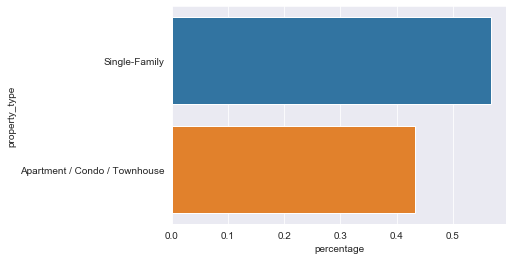

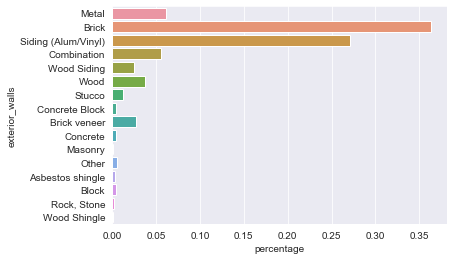

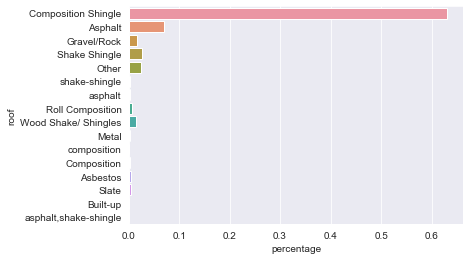

In [14]:
for c in cat_cols:
    sns.barplot(y = c, x = num_cols[0], data = df, estimator = lambda x: len(x)*1.0/len(df))
    plt.xlabel('percentage')
    plt.show()

<a id = 'num'></a>

### 4. Numerical features

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tx_price,1506.0,419130.136786,151194.479127,200000.0,297000.00,386500.0,523000.00,800000.0
beds,1506.0,3.426295,1.074723,1.0,3.00,3.0,4.00,5.0
baths,1506.0,2.580345,0.943866,1.0,2.00,3.0,3.00,6.0
sqft,1506.0,2334.859230,1339.044277,500.0,1332.00,1906.0,3028.50,8450.0
year_built,1506.0,1982.824037,20.392240,1880.0,1969.00,1986.0,2000.00,2015.0
lot_size,1506.0,13400.220452,47218.267773,0.0,1542.00,6002.5,11761.00,1220551.0
basement,1317.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
restaurants,1506.0,40.292829,46.981582,0.0,7.00,23.0,58.00,266.0
groceries,1506.0,4.455511,4.403224,0.0,1.00,3.0,7.00,23.0
nightlife,1506.0,5.067729,8.444900,0.0,0.00,2.0,6.00,54.0


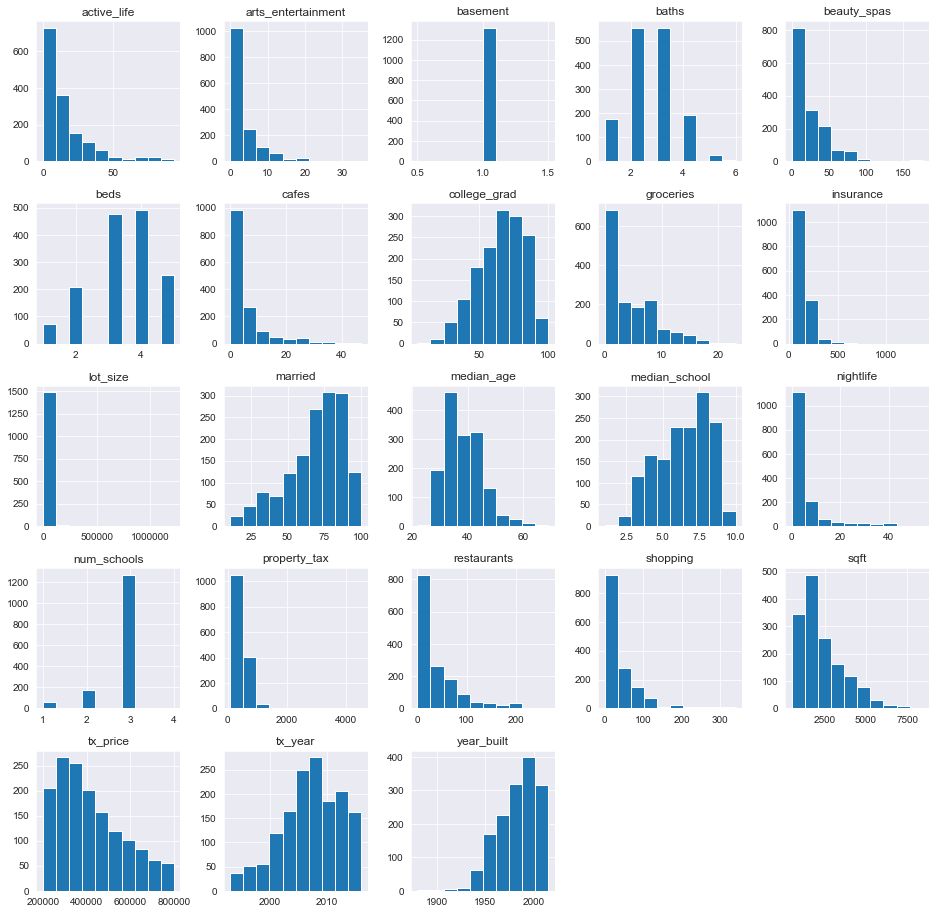

In [16]:
df.hist(figsize=(16,16))
plt.show()

<a id = 'seg'></a>
### 5. Segmentation

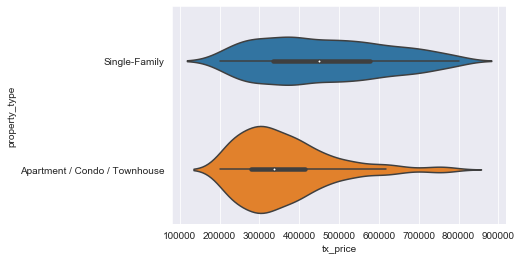

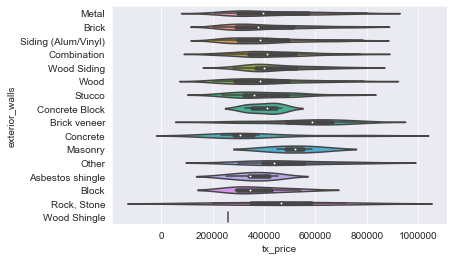

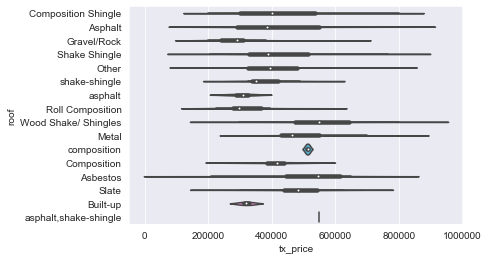

In [84]:
for c in cat_cols:
    sns.violinplot(y = c, x = target_col, data = df)
    plt.show()

In [87]:
df.groupby('property_type').mean().round().transpose()

property_type,Apartment / Condo / Townhouse,Single-Family
tx_price,362861.0,462089.0
beds,3.0,4.0
baths,2.0,3.0
sqft,1523.0,2954.0
year_built,1989.0,1978.0
lot_size,4473.0,20216.0
basement,1.0,1.0
restaurants,58.0,27.0
groceries,6.0,3.0
nightlife,8.0,3.0


In [88]:
df.groupby('exterior_walls').mean().round().transpose()

exterior_walls,Asbestos shingle,Block,Brick,Brick veneer,Combination,Concrete,Concrete Block,Masonry,Metal,Other,"Rock, Stone",Siding (Alum/Vinyl),Stucco,Wood,Wood Shingle,Wood Siding
tx_price,362116.0,376294.0,414158.0,560347.0,433415.0,372714.0,401436.0,519000.0,434012.0,495756.0,463750.0,409055.0,402611.0,407082.0,258400.0,451663.0
beds,4.0,2.0,3.0,4.0,4.0,2.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0
baths,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0
sqft,1810.0,2232.0,1951.0,2655.0,3611.0,1333.0,835.0,2135.0,2606.0,3535.0,2766.0,2405.0,2225.0,2118.0,1640.0,1246.0
year_built,1951.0,1996.0,1975.0,1955.0,1995.0,1966.0,2005.0,2004.0,1986.0,1994.0,1951.0,1986.0,1979.0,1978.0,1937.0,2000.0
lot_size,9454.0,11616.0,11038.0,7927.0,30883.0,1600.0,25510.0,570.0,14536.0,17932.0,13354.0,12765.0,12379.0,11523.0,11325.0,30451.0
basement,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
restaurants,64.0,51.0,53.0,78.0,15.0,133.0,166.0,60.0,27.0,45.0,39.0,27.0,42.0,31.0,1.0,126.0
groceries,6.0,9.0,6.0,7.0,2.0,7.0,8.0,8.0,3.0,6.0,8.0,4.0,5.0,3.0,0.0,8.0
nightlife,9.0,3.0,7.0,12.0,1.0,22.0,28.0,8.0,2.0,5.0,2.0,2.0,3.0,3.0,0.0,24.0


In [89]:
df.groupby('roof').mean().round().transpose()

roof,Asbestos,Asphalt,Built-up,Composition,Composition Shingle,Gravel/Rock,Metal,Other,Roll Composition,Shake Shingle,Slate,Wood Shake/ Shingles,asphalt,"asphalt,shake-shingle",composition,shake-shingle
tx_price,502718.0,420195.0,320054.0,405593.0,430244.0,303252.0,515000.0,412589.0,325727.0,421249.0,478783.0,550540.0,304667.0,549500.0,512526.0,387633.0
beds,4.0,4.0,2.0,4.0,4.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0
baths,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0
sqft,3446.0,2696.0,1414.0,2807.0,2432.0,1262.0,1449.0,2457.0,1039.0,2081.0,2753.0,3485.0,1878.0,4000.0,3748.0,2065.0
year_built,1972.0,1981.0,1973.0,1992.0,1983.0,1980.0,1956.0,1983.0,1967.0,1973.0,1943.0,1986.0,1973.0,1976.0,1988.0,1964.0
lot_size,30489.0,13784.0,925.0,6453.0,11309.0,1126.0,6640.0,10485.0,960.0,7505.0,26499.0,23431.0,11336.0,16552.0,44430.0,5419.0
basement,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
restaurants,15.0,36.0,100.0,45.0,31.0,77.0,33.0,45.0,96.0,30.0,76.0,14.0,44.0,1.0,28.0,47.0
groceries,2.0,4.0,4.0,7.0,4.0,8.0,4.0,4.0,10.0,3.0,7.0,1.0,6.0,0.0,4.0,6.0
nightlife,1.0,5.0,12.0,2.0,3.0,11.0,3.0,5.0,14.0,3.0,11.0,1.0,3.0,0.0,2.0,6.0


**Some observations:**
1. apartments vs house: 
    1. apartments are smaller, thus cheaper. 
    2. apartments are more likely to locat in urban areas, therefore, more entertainment around
2. construction materials:
    1. apartmenet are more likely to be made of concrete blocks, thus are built in more recent yeear, compared to hosues, and also share all other characteristics of apartments above vs houses.
    2. no other obvious relationships due to construction materials

<a id = "corr"></a>
### 6. Correlation (num vs. num)

In [90]:
df.corr()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.387126,0.391937,0.466327,0.034296,0.125810,NaN,-0.033452,-0.113497,0.016445,0.006900,-0.027652,-0.013282,-0.049288,-0.000995,0.120269,0.192515,0.271167,0.517403,0.514110,0.171688,-0.013242,0.119993
beds,0.387126,1.000000,0.647437,0.697074,-0.017676,0.145772,NaN,-0.500679,-0.433084,-0.441933,-0.467677,-0.394243,-0.426227,-0.420498,-0.486557,0.131858,0.634778,-0.064426,0.538434,0.476683,0.142305,-0.111397,-0.175925
baths,0.391937,0.647437,1.000000,0.683089,0.207708,0.107580,NaN,-0.356017,-0.351905,-0.305115,-0.314745,-0.259661,-0.293197,-0.281901,-0.333948,0.099877,0.450808,0.029022,0.508100,0.459324,0.160220,-0.098813,-0.126363
sqft,0.466327,0.697074,0.683089,1.000000,0.249258,0.213330,NaN,-0.352207,-0.376675,-0.278165,-0.298908,-0.274678,-0.279684,-0.308565,-0.329687,0.102132,0.482995,0.079124,0.643263,0.580853,0.221620,-0.101499,-0.235870
year_built,0.034296,-0.017676,0.207708,0.249258,1.000000,-0.003173,NaN,-0.121600,-0.229748,-0.095587,-0.118407,-0.136681,-0.200078,-0.187552,-0.148344,-0.248577,0.045110,-0.015805,-0.061576,-0.122343,0.167536,-0.190218,-0.041264
lot_size,0.125810,0.145772,0.107580,0.213330,-0.003173,1.000000,NaN,-0.098679,-0.100304,-0.059361,-0.086103,-0.105390,-0.046883,-0.104786,-0.074066,0.082215,0.107624,-0.032893,0.136516,0.119585,0.083890,-0.029869,-0.027819
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.033452,-0.500679,-0.356017,-0.352207,-0.121600,-0.098679,NaN,1.000000,0.691823,0.926430,0.938910,0.820841,0.733541,0.863114,0.881747,-0.051137,-0.619176,0.214399,-0.096773,-0.016735,-0.061799,0.247041,0.049127
groceries,-0.113497,-0.433084,-0.351905,-0.376675,-0.229748,-0.100304,NaN,0.691823,1.000000,0.549229,0.593840,0.524463,0.499258,0.621383,0.568352,-0.011635,-0.506221,-0.010504,-0.158388,-0.094221,-0.350558,0.275661,0.119455
nightlife,0.016445,-0.441933,-0.305115,-0.278165,-0.095587,-0.059361,NaN,0.926430,0.549229,1.000000,0.924589,0.749889,0.710418,0.770689,0.856967,-0.021324,-0.570640,0.254283,-0.048662,0.029117,-0.024681,0.193819,0.029996


In [95]:
corr = df.corr()

In [102]:
mask = np.zeros_like(corr, dtype = np.bool)

In [105]:
mask[np.triu_indices_from(mask)] = True

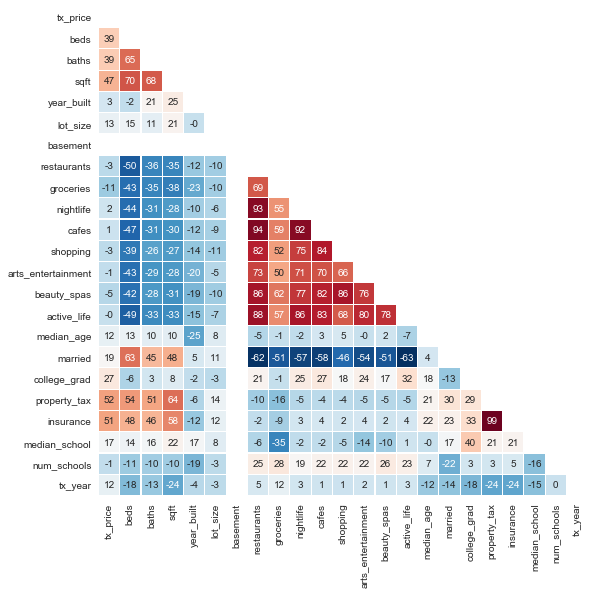

In [116]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,9))
sns.heatmap(corr*100, mask = mask, square = True, cbar = False, cmap = 'RdBu_r', annot = True, fmt = '.0f', linewidth = 0.1)
plt.show()


**Findings from EDA:**
- missing values that needs to be dealt with
- sparse categories
- typos in categorical features
- possible outliers in *lot_size*
- indicator variable: *basement*
- neighborhood correlation strong
- price positively linked with property tax and insurance as to be expected, and property tax is indeed public record, same as insurance information that was obtained by the client. Otherwise, consider data leakage.
- single family with more married couple and quieter suburban neighborhood, all make sense.